In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import numpy as np

In [ ]:
raw_metro = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv')
print('hello')

In [3]:
print(raw_metro.shape)
raw_metro.head(5)

(892939, 31)


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,7/1/2019 17:31,7/1/2019 18:17,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,3/31/2018 12:21,3/31/2018 19:41,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,4/6/2020 11:15,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,5/29/2017 2:33,5/29/2017 4:27,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 18:30,12/16/2017 22:44,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [4]:
raw_metro['Incident Occurred'] = pd.to_datetime(raw_metro['Incident Occurred'])

In [5]:
filtered_metro = raw_metro[raw_metro['Incident Occurred'] >= '2020-01-01']

In [6]:
raw_metro.value_counts('Offense Description').head(20)

Offense Description
POLICE INQUIRY                               167672
BURGLARY- MOTOR VEHICLE                       64184
SIMPLE ASSLT                                  55845
DAMAGE PROP - PRIVATE                         45345
SHOPLIFTING                                   35919
LOST PROPERTY                                 28179
FOUND PROPERTY                                28155
ASSAULT- FEAR OF BODILY INJURY                27821
RECOVERY, STOLEN PROPERTY                     26776
WEAPON OFFENSE, CRIMINAL ATTEMPT              25769
LARC - FROM BLDG                              23627
VEHICLE THEFT                                 22936
DRUG PARAPHERNALIA- UNLAWFUL USE              22857
BURGLARY- AGGRAVATED                          19530
INTENTIONAL AGGRAVATED ASSAULT                18477
ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT     15200
ROBBERY                                       14619
TRANSPORT                                     13801
LARC - PARTS FROM VEH                       

In [7]:
raw_metro.value_counts('Zone').head(20)

Zone
313.0    15373
515.0    15370
211.0    14448
223.0    14286
715.0    13929
721.0    13358
621.0    13319
817.0    13170
321.0    13100
511.0    12998
613.0    12974
535.0    12805
221.0    12703
527.0    12636
727.0    12581
623.0    12388
111.0    12190
213.0    12189
815.0    12176
115.0    11977
dtype: int64

In [8]:
filtered_metro

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,1/9/2020 16:31,400 400,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214)
12,20210244443_12,20210244443,S,SUSPECT,A,CLEARED BY ARREST,Closed,2021-05-02 01:30:00,5/5/2021 15:54,400 400,...,PERSONAL (HANDS),2,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.799 36.1)
13,20200298561_11,20200298561,D,DISPATCHED,O,OPEN,Open,2020-04-27 10:30:00,4/27/2020 15:16,AIRPARK DR,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.7 36.19)
14,20210168072_11,20210168072,T,NaN,U,UNFOUNDED,Closed,2021-03-23 15:00:00,3/24/2021 11:55,806 806,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.59 36.175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892934,20220559925_11,20220559925,D,DISPATCHED,O,OPEN,Open,2022-11-06 02:00:00,11/6/2022 5:10,MARGO,...,HANDGUN,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.7 36.08)
892935,20220657438_11,20220657438,D,DISPATCHED,U,UNFOUNDED,Closed,2022-12-28 12:20:00,12/28/2022 13:35,107 107,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.724 36.267)
892936,20220657558_11,20220657558,T,NaN,O,OPEN,Open,2022-12-22 12:00:00,12/28/2022 14:09,HAYWOOD LN,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.69 36.07)
892937,20220551034_11,20220551034,D,DISPATCHED,O,OPEN,Open,2022-11-01 13:00:00,11/1/2022 16:21,MUSIC CITY CIR,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.7 36.22)


In [9]:
filtered_metro.head(5)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,1/9/2020 16:31,400 400,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214)
12,20210244443_12,20210244443,S,SUSPECT,A,CLEARED BY ARREST,Closed,2021-05-02 01:30:00,5/5/2021 15:54,400 400,...,PERSONAL (HANDS),2,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.799 36.1)
13,20200298561_11,20200298561,D,DISPATCHED,O,OPEN,Open,2020-04-27 10:30:00,4/27/2020 15:16,AIRPARK DR,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.7 36.19)
14,20210168072_11,20210168072,T,NaN,U,UNFOUNDED,Closed,2021-03-23 15:00:00,3/24/2021 11:55,806 806,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.59 36.175)


In [10]:
filtered_metro.value_counts('Offense Description').head(10)

Offense Description
POLICE INQUIRY                      75013
BURGLARY- MOTOR VEHICLE             33202
SIMPLE ASSLT                        24550
DAMAGE PROP - PRIVATE               20242
FOUND PROPERTY                      14303
SHOPLIFTING                         14123
LOST PROPERTY                       13660
ASSAULT- FEAR OF BODILY INJURY      13281
WEAPON OFFENSE, CRIMINAL ATTEMPT    12626
RECOVERY, STOLEN PROPERTY           12554
dtype: int64

In [11]:
filtered_metro.value_counts('Zone').head(10)

Zone
515.0    5242
223.0    5147
313.0    5071
817.0    4784
715.0    4625
815.0    4458
211.0    4431
535.0    4373
613.0    4366
811.0    4354
dtype: int64

In [32]:
early_metro = raw_metro[(raw_metro['Incident Occurred'] >= '2016-01-01') & (raw_metro['Incident Occurred'] < '2023-01-01')]

In [33]:
early_metro

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location,Year
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-01 17:31:00,7/1/2019 18:17,2410 2410,...,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218),2019
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,3/31/2018 19:41,5824 5824,...,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042),2018
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232),2020
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,2017-05-29 02:33:00,5/29/2017 4:27,1714 1714,...,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086),2017
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,12/16/2017 22:44,1101 1101,...,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178),2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892934,20220559925_11,20220559925,D,DISPATCHED,O,OPEN,Open,2022-11-06 02:00:00,11/6/2022 5:10,MARGO,...,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.7 36.08),2022
892935,20220657438_11,20220657438,D,DISPATCHED,U,UNFOUNDED,Closed,2022-12-28 12:20:00,12/28/2022 13:35,107 107,...,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.724 36.267),2022
892936,20220657558_11,20220657558,T,NaN,O,OPEN,Open,2022-12-22 12:00:00,12/28/2022 14:09,HAYWOOD LN,...,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.69 36.07),2022
892937,20220551034_11,20220551034,D,DISPATCHED,O,OPEN,Open,2022-11-01 13:00:00,11/1/2022 16:21,MUSIC CITY CIR,...,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.7 36.22),2022


In [34]:
early_metro.value_counts('Offense Description').head(10)

Offense Description
POLICE INQUIRY                      158315
BURGLARY- MOTOR VEHICLE              60699
SIMPLE ASSLT                         53212
DAMAGE PROP - PRIVATE                43670
SHOPLIFTING                          34559
LOST PROPERTY                        26307
ASSAULT- FEAR OF BODILY INJURY       26030
FOUND PROPERTY                       26021
RECOVERY, STOLEN PROPERTY            25169
WEAPON OFFENSE, CRIMINAL ATTEMPT     24226
dtype: int64

In [35]:
early_metro.value_counts('Zone').head(10)

Zone
313.0    15373
515.0    15369
211.0    14448
223.0    14286
715.0    13927
721.0    13358
621.0    13318
817.0    13170
321.0    13100
511.0    12998
dtype: int64

In [40]:
target_metro = raw_metro[(raw_metro['Incident Occurred'] >= '2016-01-01') & (raw_metro['Incident Occurred'] < '2023-01-01')]

In [41]:
target_metro.value_counts('Zone').head(20)

Zone
313.0    15373
515.0    15369
211.0    14448
223.0    14286
715.0    13927
721.0    13358
621.0    13318
817.0    13170
321.0    13100
511.0    12998
613.0    12974
535.0    12804
221.0    12702
527.0    12636
727.0    12581
623.0    12386
111.0    12190
213.0    12189
815.0    12176
115.0    11977
dtype: int64

In [42]:
target_metro.value_counts('Offense Description').head(20)

Offense Description
POLICE INQUIRY                               158315
BURGLARY- MOTOR VEHICLE                       60699
SIMPLE ASSLT                                  53212
DAMAGE PROP - PRIVATE                         43670
SHOPLIFTING                                   34559
LOST PROPERTY                                 26307
ASSAULT- FEAR OF BODILY INJURY                26030
FOUND PROPERTY                                26021
RECOVERY, STOLEN PROPERTY                     25169
WEAPON OFFENSE, CRIMINAL ATTEMPT              24226
LARC - FROM BLDG                              22434
DRUG PARAPHERNALIA- UNLAWFUL USE              21935
VEHICLE THEFT                                 21407
BURGLARY- AGGRAVATED                          19151
INTENTIONAL AGGRAVATED ASSAULT                16946
ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT     14087
ROBBERY                                       13940
FRAUD -  ILLEG USE OF CREDIT CARDS            13534
LARC - PARTS FROM VEH                       

In [43]:
top10_crimes=target_metro.value_counts('Offense Description').head(10)
top10_crimes

Offense Description
POLICE INQUIRY                      158315
BURGLARY- MOTOR VEHICLE              60699
SIMPLE ASSLT                         53212
DAMAGE PROP - PRIVATE                43670
SHOPLIFTING                          34559
LOST PROPERTY                        26307
ASSAULT- FEAR OF BODILY INJURY       26030
FOUND PROPERTY                       26021
RECOVERY, STOLEN PROPERTY            25169
WEAPON OFFENSE, CRIMINAL ATTEMPT     24226
dtype: int64

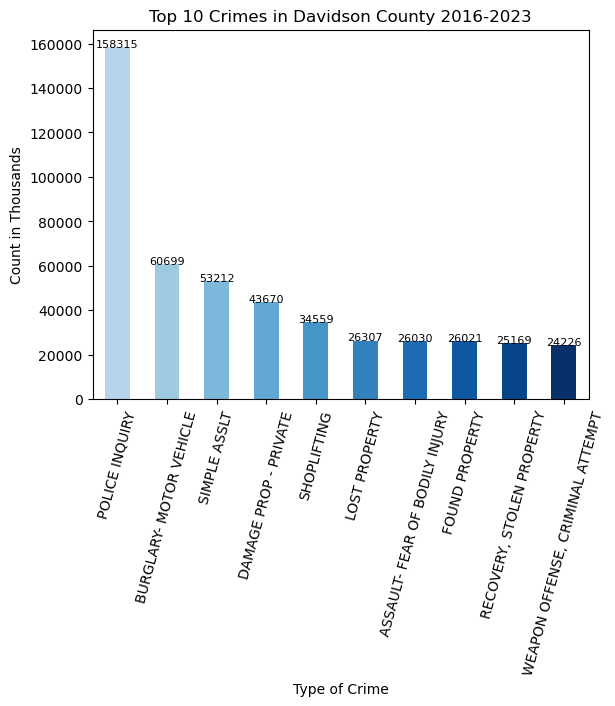

In [44]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top10_crimes.plot(kind='bar',color=blues)

plt.title('Top 10 Crimes in Davidson County 2016-2023')
plt.xlabel('Type of Crime')
plt.ylabel('Count in Thousands')
for index,data in enumerate(top10_crimes):
    plt.annotate(f"{data}", xy=(index,data), ha='center', fontsize=8)
    
plt.xticks(rotation=75)
plt.show()

In [45]:
top_10zone=target_metro.value_counts('Zone').head(10)
top_10zone

Zone
313.0    15373
515.0    15369
211.0    14448
223.0    14286
715.0    13927
721.0    13358
621.0    13318
817.0    13170
321.0    13100
511.0    12998
dtype: int64

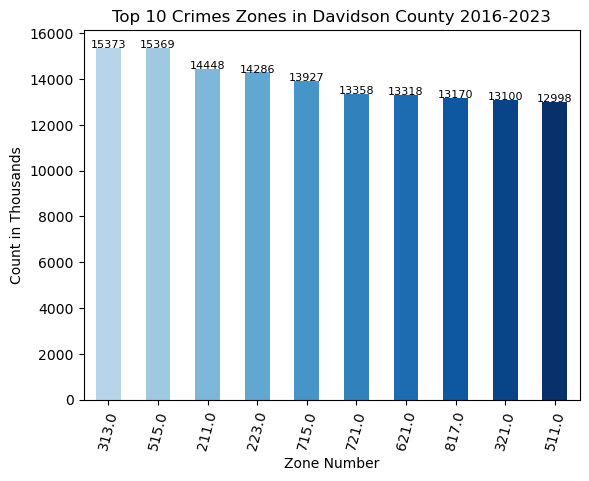

In [46]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top_10zone.plot(kind='bar', color = blues)

plt.title('Top 10 Crimes Zones in Davidson County 2016-2023')
plt.xlabel('Zone Number')
plt.ylabel('Count in Thousands')
for index,data in enumerate(top_10zone):
    plt.annotate(f"{data}", xy=(index,data), ha='center', fontsize=8)
    
plt.xticks(rotation=75)
plt.show()

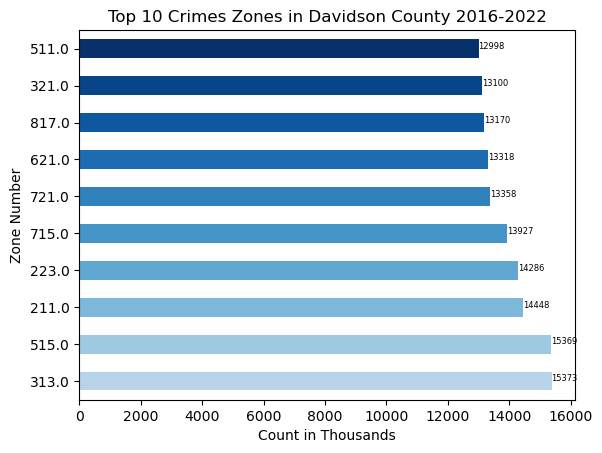

In [49]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top_10zone.plot(kind='barh', color = blues)

plt.title('Top 10 Crimes Zones in Davidson County 2016-2022')
plt.xlabel('Count in Thousands')
plt.ylabel('Zone Number')
for index,data in enumerate(top_10zone):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

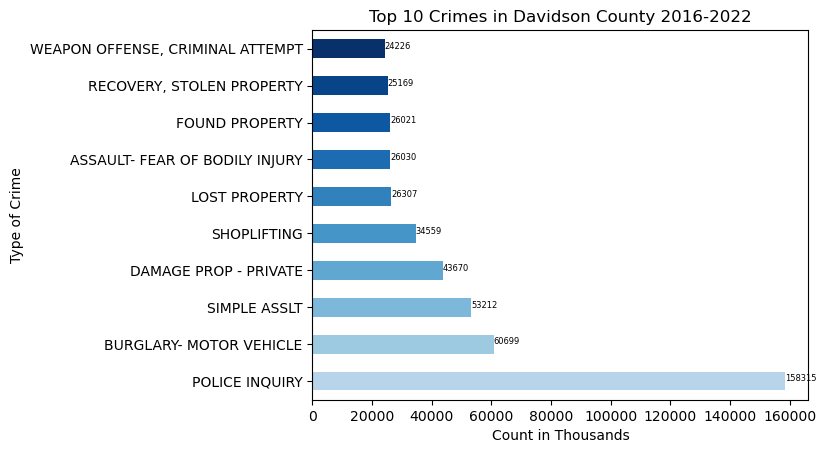

In [50]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top10_crimes.plot(kind='barh', color = blues)

plt.title('Top 10 Crimes in Davidson County 2016-2022')
plt.xlabel('Count in Thousands')
plt.ylabel('Type of Crime')
for index,data in enumerate(top10_crimes):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

In [51]:

target_metro['Year'] = target_metro['Incident Occurred'].dt.year
crime_by_year = target_metro['Year'].value_counts()
print(crime_by_year)

2018    124564
2017    123520
2016    121909
2022    119911
2019    119604
2020    118090
2021    115823
Name: Year, dtype: int64


C:\Users\rober\AppData\Local\Temp\ipykernel_16828\2706100322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_metro['Year'] = target_metro['Incident Occurred'].dt.year


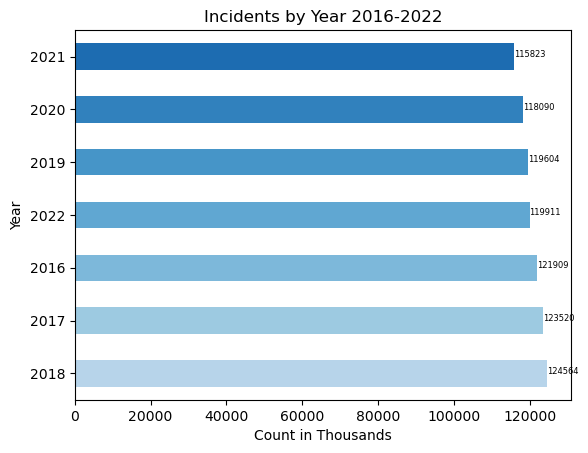

In [53]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime_by_year.plot(kind='barh', color = blues)

plt.title('Incidents by Year 2016-2022')
plt.xlabel('Count in Thousands')
plt.ylabel('Year')
for index,data in enumerate(crime_by_year):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

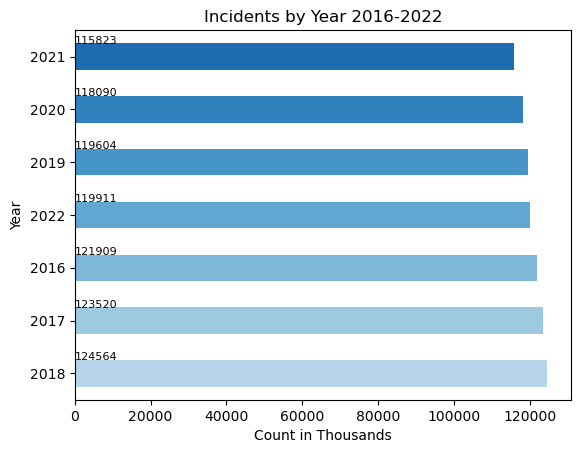

In [54]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime_by_year.plot(kind='barh', color = blues)

plt.title('Incidents by Year 2016-2022')
plt.xlabel('Count in Thousands')
plt.ylabel('Year')
for index,data in enumerate(crime_by_year):
    plt.annotate(f"{data}", xy=(data,index), xytext=(5, index+0.25), ha='left', fontsize=8)

plt.yticks(rotation=0)
plt.show()

In [58]:
crime10_zip=target_metro['ZIP Code'].value_counts().head(10)
crime10_zip

37207.0    47679
37211.0    41987
37013.0    41064
37115.0    38113
37208.0    26898
37203.0    26624
37210.0    25624
37206.0    23813
37209.0    23525
37217.0    22652
Name: ZIP Code, dtype: int64

In [59]:
zip10=crime10_zip.astype(int)
zip10

37207.0    47679
37211.0    41987
37013.0    41064
37115.0    38113
37208.0    26898
37203.0    26624
37210.0    25624
37206.0    23813
37209.0    23525
37217.0    22652
Name: ZIP Code, dtype: int32

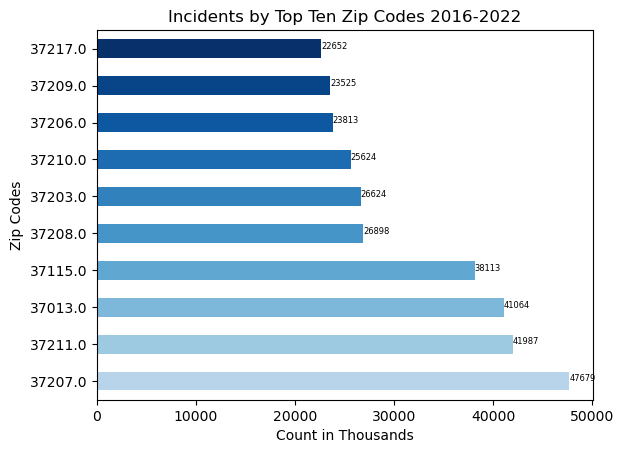

In [61]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime10_zip.plot(kind='barh', color = blues)

plt.title('Incidents by Top Ten Zip Codes 2016-2022')
plt.xlabel('Count in Thousands')
plt.ylabel('Zip Codes')
for index,data in enumerate(crime10_zip):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()